In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install -q kaggle
!pip install -q kaggle-cli
!mkdir -p ~/.kaggle

     |████████████████████████████████| 81kB 5.1MB/s 
     |████████████████████████████████| 4.2MB 10.5MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 112kB 59.3MB/s 
     |████████████████████████████████| 143kB 56.8MB/s 
  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-19w2ecu7/lxml/setup.py'"'"'; __file__='"'"'/tmp/pip-install-19w2ecu7/lxml/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-_sewj5ee/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahidrazashaikh","key":"a29e44c08517e216dbaf39b04d4e5b0c"}'}

In [ ]:


!cp "/content/kaggle.json" ~/.kaggle/

In [ ]:
!cat ~/.kaggle/kaggle.json 
!chmod 600 ~/.kaggle/kaggle.json

{"username":"shahidrazashaikh","key":"a29e44c08517e216dbaf39b04d4e5b0c"}

In [ ]:
!kaggle datasets download -d nabeelsajid917/covid-19-x-ray-10000-images -p dataset

 97% 90.0M/92.7M [00:01<00:00, 56.0MB/s]
100% 92.7M/92.7M [00:01<00:00, 79.9MB/s]


In [ ]:
cp -r /content/dataset/covid-19-x-ray-10000-images.zip /content/gdrive/MyDrive/Covid-dataset

In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/Covid-dataset')

In [ ]:
rm -r /content/gdrive/MyDrive/Covid-dataset/augmented_data/normal

In [ ]:
# !cat /content/gdrive/MyDrive/Covid-dataset/generate_images.py 
!python generate_images.py --dataset /content/gdrive/MyDrive/Covid-dataset/dataset/normal --output /content/gdrive/MyDrive/Covid-dataset/augmented_data/normal --total 75

2021-03-07 06:32:29.182033: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
[INFO] loading images...
[INFO] loading example image...
[INFO] generating images...
[INFO] loading example image...
[INFO] generating images...
[INFO] loading example image...
[INFO] generating images...
[INFO] loading example image...
[INFO] generating images...
[INFO] loading example image...
[INFO] generating images...
[INFO] loading example image...
[INFO] generating images...
[INFO] loading example image...
[INFO] generating images...
[INFO] loading example image...
[INFO] generating images...
[INFO] loading example image...
[INFO] generating images...
[INFO] loading example image...
[INFO] generating images...
[INFO] loading example image...
[INFO] generating images...
[INFO] loading example image...
[INFO] generating images...
[INFO] loading example image...
[INFO] generating images...
[INFO] loading example image...
[INFO] generating

In [ ]:
import os 
li=os.listdir('/content/gdrive/MyDrive/Covid-dataset/augmented_data/normal')

In [ ]:
rm -r /content/gdrive/MyDrive/Covid-dataset/augmented_data/covid

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten ,Conv2D, MaxPooling2D ,BatchNormalization
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:

covid_path='/content/gdrive/MyDrive/Covid-dataset/augmented_data/covid'
normal_path='/content/gdrive/MyDrive/Covid-dataset/augmented_data/normal'
X=[]
Y=[]
SIZE = 224
def getimage(path,label):
  img_dir=os.listdir(path)
  for i in tqdm(range(len(img_dir))):
    img =image.load_img(os.path.join(path,img_dir[i]),target_size=(SIZE,SIZE,3))
    img =image.img_to_array(img)
    img =img/255.
    X.append(img)
    Y.append(label)

In [ ]:
getimage(covid_path,0)

100%|██████████| 1914/1914 [09:26<00:00,  3.38it/s]


In [ ]:
getimage(normal_path,1)

100%|██████████| 1897/1897 [09:28<00:00,  3.34it/s]


In [ ]:
len(X),len(Y)

(3811, 3811)

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
import pickle
pic=open('Y_covid.pickle','wb')
pickle.dump(Y,pic)
pic.close()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)


In [ ]:
def create_model():
  model = Sequential()

  model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3),padding = 'same', kernel_initializer = 'he_uniform'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu',padding = 'same', kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu", padding = 'same', kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      1216      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 32)        1

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5,restore_best_weights=True, verbose=1)

model_check_point = ModelCheckpoint(filepath ='Covid.h5', monitor='val_loss', verbose=1, save_best_only=True,
                                    save_weights_only=False, mode='auto', save_freq='epoch')

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32 , callbacks=[early_stop, model_check_point])


Epoch 1/100
96/96 [==============================] - 5s 53ms/step - loss: 0.0280 - accuracy: 0.9928 - val_loss: 0.0155 - val_accuracy: 0.9934

Epoch 00001: val_loss improved from 0.02275 to 0.01550, saving model to Covid.h5
Epoch 2/100
96/96 [==============================] - 5s 52ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.3743 - val_accuracy: 0.9266

Epoch 00002: val_loss did not improve from 0.01550
Epoch 3/100
96/96 [==============================] - 5s 51ms/step - loss: 0.0437 - accuracy: 0.9902 - val_loss: 0.0510 - val_accuracy: 0.9869

Epoch 00003: val_loss did not improve from 0.01550
Epoch 4/100
96/96 [==============================] - 5s 52ms/step - loss: 0.0280 - accuracy: 0.9951 - val_loss: 0.0464 - val_accuracy: 0.9869

Epoch 00004: val_loss did not improve from 0.01550
Epoch 5/100
96/96 [==============================] - 5s 52ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0834 - val_accuracy: 0.9725

Epoch 00005: val_loss did not improve from 0.01550


In [ ]:
!cp  /content/Y_covid.pickle /content/gdrive/MyDrive/Covid-dataset/pickle_file

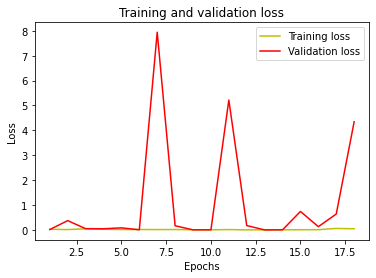

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

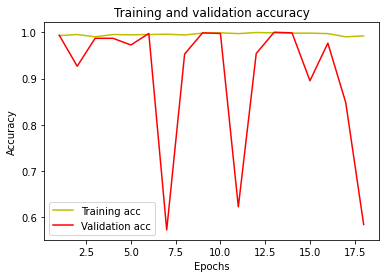

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

24/24 [==============================] - 1s 21ms/step - loss: 7.4782e-04 - accuracy: 1.0000


[0.0007478249608539045, 1.0]

In [ ]:
cp /content/Covid_pre.h5 /content/gdrive/MyDrive/Covid-dataset

In [ ]:
from keras.models import load_model
my_model= load_model('/content/Covid_pre.h5')

In [ ]:
# for i in X_test:
#   my_model.predict(i)
#   break
result=my_model.predict(X_test[:15])

In [ ]:
for i in result:
  print(int(i))

1
0
0
0
0
0
1
1
1
0
0
0
0
0
0


In [ ]:
y_test[:15]

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0])